In [65]:
import os
from pprint import pprint
from astropy.io import fits
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [66]:
fits_export_dir = '/data/scratch/btwedig/mejiro/fits_export'

In [67]:
fits_paths = sorted(glob(f'{fits_export_dir}/*.fits'))
sample_fits_file = np.random.choice(fits_paths)

fits.info(sample_fits_file)

Filename: /data/scratch/btwedig/mejiro/fits_export/strong_lens_00000005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (3, 90, 90)   uint8   
  1  F087          1 ImageHDU        16   (90, 90)   float32   
  2  F106          1 ImageHDU        16   (90, 90)   float32   
  3  F129          1 ImageHDU        16   (90, 90)   float32   
  4  F158          1 ImageHDU        16   (90, 90)   float32   
  5  F087 SOURCE    1 ImageHDU        15   (90, 90)   float32   
  6  F106 SOURCE    1 ImageHDU        15   (90, 90)   float32   
  7  F129 SOURCE    1 ImageHDU        15   (90, 90)   float32   
  8  F158 SOURCE    1 ImageHDU        15   (90, 90)   float32   


View color image in primary HDU

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                    3                                                  
NAXIS2  =                   90                                                  
NAXIS3  =                   90                                                  
EXTEND  =                    T                                                  
VERSION = '0.0     '           / mejiro version                                 
AUTHOR  = 'btwedig@uzay.mit.edu' / username@host for calculation                
R_BAND  = 'F158    '           / Filter for red channel of RGB image            
G_BAND  = 'F129    '           / Filter for green channel of RGB image          
B_BAND  = 'F087    '           / Filter for blue channel of RGB image           


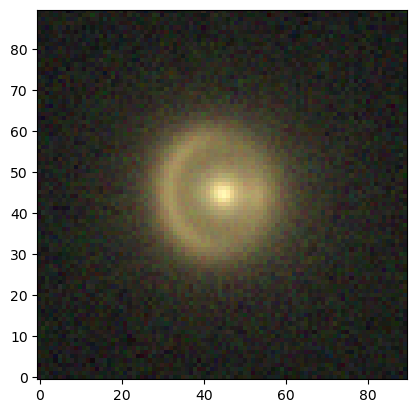

In [68]:
data, hdr = fits.getdata(sample_fits_file, extname='PRIMARY', header=True)
pprint(hdr)
plt.imshow(data, origin='lower')
plt.show()

In [69]:
bands = ['F087', 'F106', 'F129', 'F158']

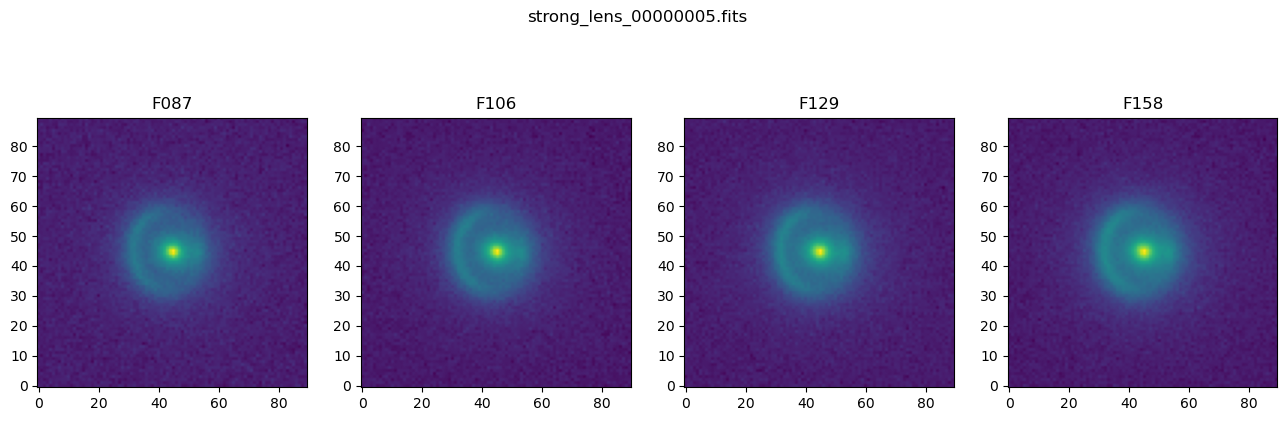

Header for F158:
XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   90                                                  
NAXIS2  =                   90                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
VERSION = '0.0     '           / mejiro version                                 
AUTHOR  = 'btwedig@uzay.mit.edu' / username@host for calculation                
INSTRUME= 'WFI     '           / Instrument                                     
FILTER  = 'F158    '           / Filter                                         
OVERSAMP=                    5 / Oversampling used in calculation               
PIXELSCL=  

In [70]:
_, ax = plt.subplots(1, len(bands), figsize=(len(bands) * 4, 5))

for i, band in enumerate(bands):
    data, hdr = fits.getdata(sample_fits_file, extname=band, header=True)
    ax[i].imshow(np.log10(data), origin='lower')
    ax[i].set_title(band)
    
plt.suptitle(f'{os.path.basename(sample_fits_file)}')
plt.show()

print(f'Header for {band}:')
pprint(hdr)

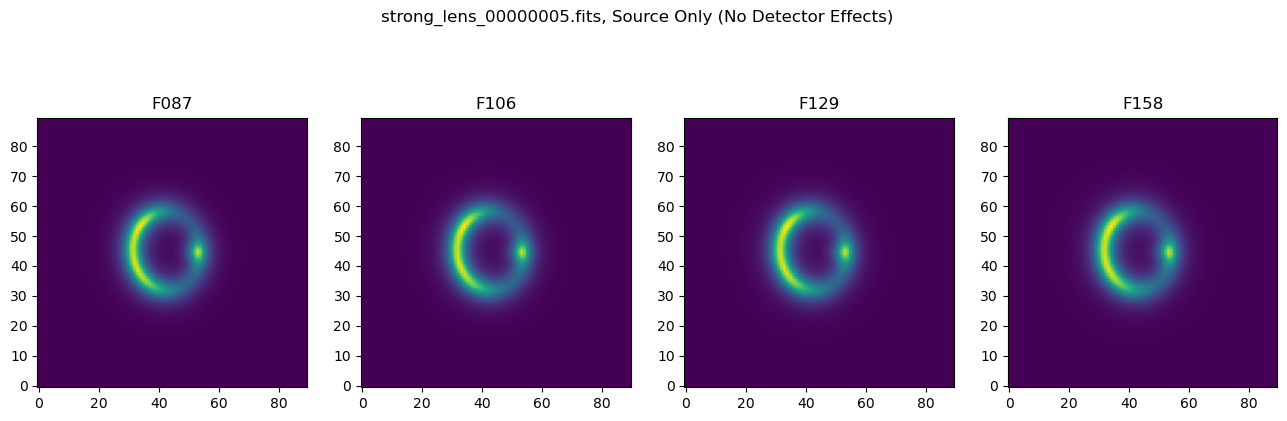

Header for F158:
XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   90                                                  
NAXIS2  =                   90                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
VERSION = '0.0     '           / mejiro version                                 
AUTHOR  = 'btwedig@uzay.mit.edu' / username@host for calculation                
INSTRUME= 'WFI     '           / Instrument                                     
FILTER  = 'F158    '           / Filter                                         
OVERSAMP=                    5 / Oversampling used in calculation               
PIXELSCL=  

In [71]:
_, ax = plt.subplots(1, len(bands), figsize=(len(bands) * 4, 5))

for i, band in enumerate(bands):
    data, hdr = fits.getdata(sample_fits_file, extname=f'{band} SOURCE', header=True)
    ax[i].imshow(data, origin='lower')
    ax[i].set_title(band)
    
plt.suptitle(f'{os.path.basename(sample_fits_file)}, Source Only (No Detector Effects)')
plt.show()

print(f'Header for {band}:')
pprint(hdr)